In [21]:
import numpy as np
import pandas as pd
import plotly.express as px
import statsmodels.formula.api as smf

import sys; sys.path.insert(0, '..')
from utils import LinearRegDiagnostic

a)

In [3]:
np.random.seed(1)
x1 = np.random.uniform(size=100)
x2 = 0.5 * x1 + np.random.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + np.random.normal(size=100)
data = pd.DataFrame(data={"x1": x1, "x2": x2, "y": y})

$$
    y = 2 + 2 x_1 + 0.3 x_2 + \epsilon
$$

$$
    \beta_0 = 2; \beta_1 = 2; \beta_2 = 0.3
$$

b)

In [7]:
print(np.corrcoef(x1, x2))

[[1.         0.83905962]
 [0.83905962 1.        ]]


In [13]:
px.scatter(x=x1, y=x2, labels={'x':'x1', 'y':'x2'})

c)

In [14]:
results = smf.ols("y ~ x1 + x2", data=data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Fri, 05 May 2023   Prob (F-statistic):           4.40e-07
Time:                        15:47:45   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1893      0.199     11.021      0.0

$$
    \hat{\beta_0} = 2.19; \hat{\beta_1} = 0.70; \hat{\beta_2} = 2.50
$$

- The standard error increases from from x1 to x2, it is also high for all predictors
- The coefficients of the predictors are very different from the regression ones
- The p-value for $\hat{\beta_1}$ is bigger than 0.05 so the null hypothesis could not be rejected
- The p-value for $\hat{\beta_2}$ is smaller than 0.05 so the null hypothesis can be rejected

d)

In [10]:
results_only_x1 = smf.ols("y ~ x1", data=data).fit()
print(results_only_x1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Fri, 05 May 2023   Prob (F-statistic):           6.68e-07
Time:                        15:36:31   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2486      0.201     11.209      0.0

With only x1 in the fit, the null hypothesis can be rejected

e)

In [11]:
results_only_x2 = smf.ols("y ~ x2", data=data).fit()
print(results_only_x2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Fri, 05 May 2023   Prob (F-statistic):           1.09e-07
Time:                        15:37:43   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2655      0.187     12.145      0.0

With only x2 in the fit, the null hypothesis can be rejected

f)

In item **c)** there is a problem with collinearity, because of that the responses of items **c)**, **d)** and **e)** are not contradictory.

g)

In [18]:
x1 = np.concatenate((x1, [0.1]))
x2 = np.concatenate((x2, [0.8]))
y = np.concatenate((y, [6]))
data = pd.DataFrame(data={"x1": x1, "x2": x2, "y": y})

results = smf.ols("y ~ x1 + x2", data=data).fit()
results_only_x1 = smf.ols("y ~ x1", data=data).fit()
results_only_x2 = smf.ols("y ~ x2", data=data).fit()

px.scatter(x=x1, y=x2, labels={'x':'x1', 'y':'x2'})

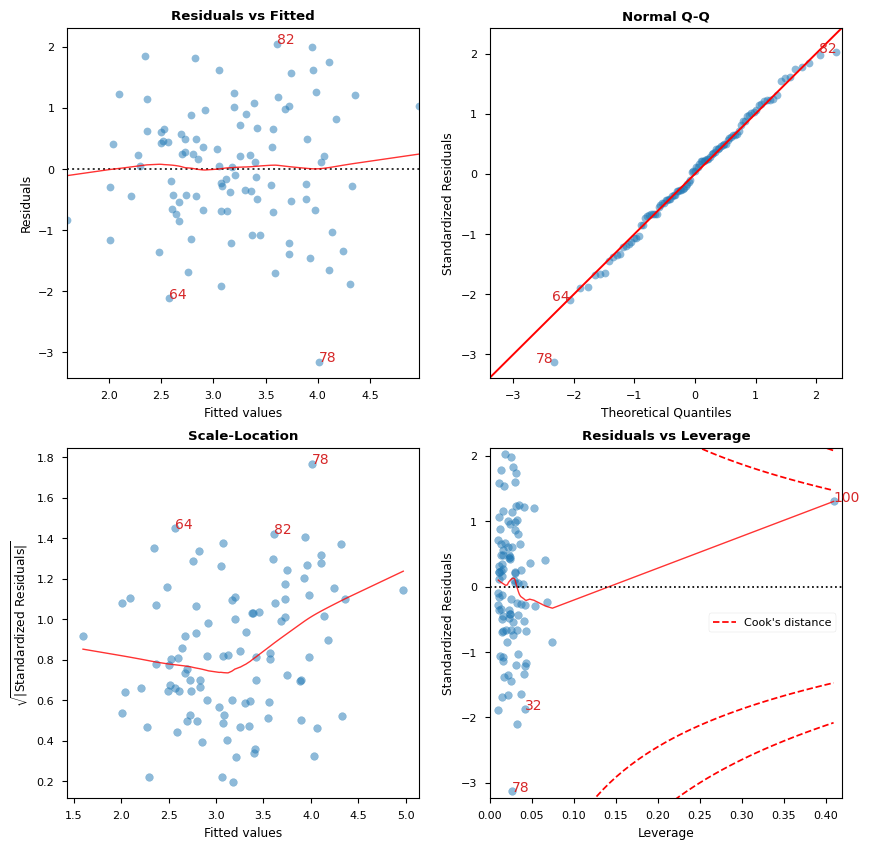

    Features  VIF Factor
1         x1        2.28
2         x2        2.28
0  Intercept        3.83


In [22]:
cls = LinearRegDiagnostic(results)
vif, fig, ax = cls()
print(vif)

- Point 101 is high leverage but not an outlier

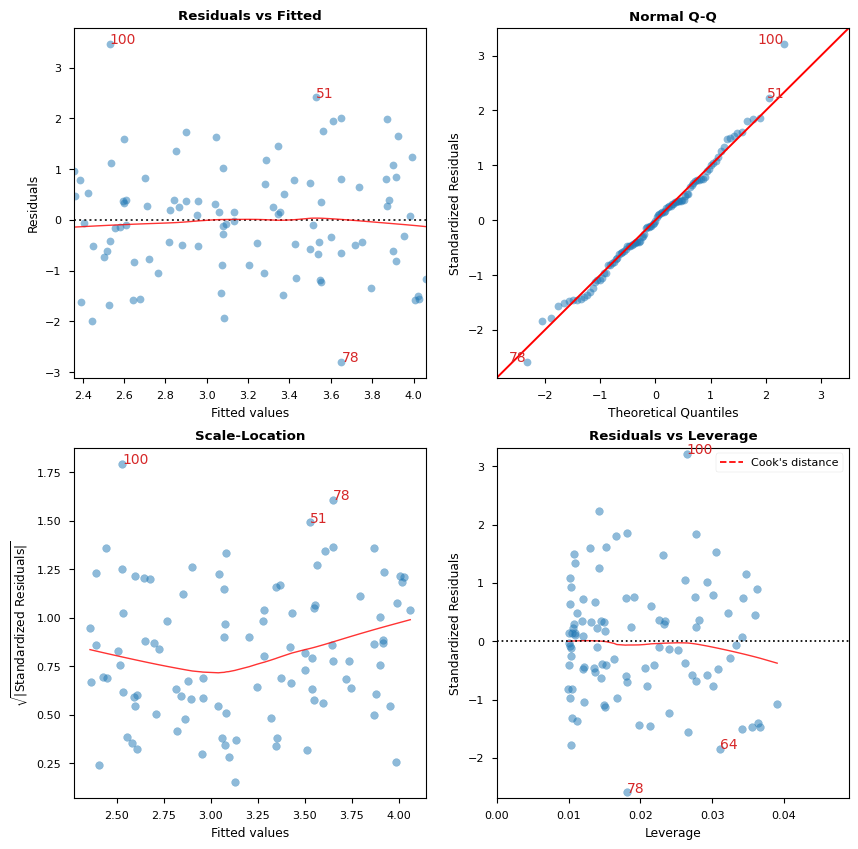

    Features  VIF Factor
1         x1        1.00
0  Intercept        3.66


In [23]:
cls = LinearRegDiagnostic(results_only_x1)
vif, fig, ax = cls()
print(vif)

- Point 101 is an outlier and is high leverage

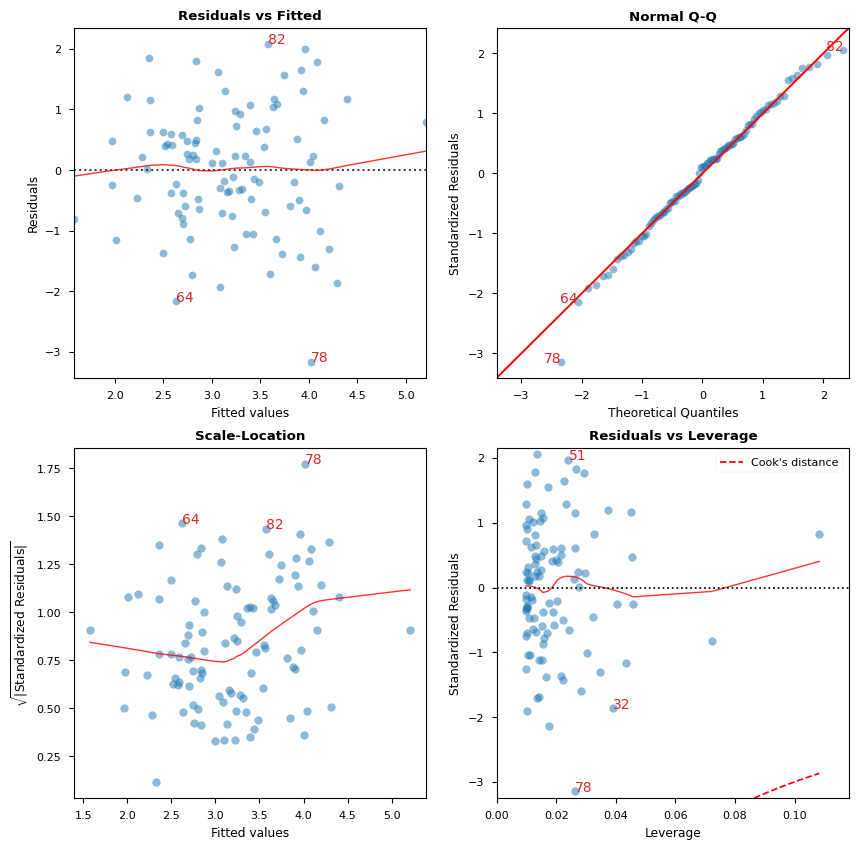

    Features  VIF Factor
1         x2        1.00
0  Intercept        3.22


In [24]:
cls = LinearRegDiagnostic(results_only_x2)
vif, fig, ax = cls()
print(vif)

- Point 101 is neither an outlier or is high leverage